<h1> MTPB Data: step-by-step instructions --> incremental code generation </h1>

<p>
generate code using MTPB's "prompt" instructions, alternating between prompts and code as shown below:

Input: prompt1
Output: code1

Input: code1 + prompt2
Output: code2

Input: code1 + code2 + prompt3
Output: code3</p>

<h1>Exploration of the reports and outputs<h1>

In [1]:
import pandas as pd
import ast

def count_pass_one_completed(df):
    count_succes = 0
    indexes_successful = []
    number_of_success = []
    for i in range(len(df)):
        test = ast.literal_eval(df.iloc[i]['Pass_one'])
        count_succes+=sum(test)
        if sum(test) >= 1:
            indexes_successful.append(i)
            number_of_success.append(sum(test))
    
    return count_succes, number_of_success, indexes_successful

# instanciation
report_baseline = pd.read_csv('data/MTBP/reports/reports_MTBP_Processed_Greedy_solutions.csv')
report_lbl_w = pd.read_csv('data/MTBP/reports/reports_line_by_line_with_context_Sampling.csv')
report_lbl_wo = pd.read_csv('data/MTBP/reports/reports_line_by_line_without_context_Sampling.csv')
report_str_S = pd.read_csv('data/MTBP/reports/reports_structural_mtbp_with_context_Sampling.csv') 
report_str_G = pd.read_csv('data/MTBP/reports/reports_structural_mtbp_with_context_Greedy.csv') 
report_str_noC_G = pd.read_csv('data/MTBP/reports/reports_no#_structural_mtbp_with_context_Greedy.csv')
report_prompy_vs_context = pd.read_csv('data/MTBP/reports/reports_prompt_vs_context.csv')
report_token_pen = pd.read_csv('data/MTBP/reports/reports_token_length_penalty.csv')
report_word_pen = pd.read_csv('data/MTBP/reports/reports_words_length_penalty.csv')
report_line_pen = pd.read_csv('data/MTBP/reports/reports_lines_lenght_penalty.csv')

report_token_pen_noreturns= pd.read_csv('data/MTBP/reports/reports_token_length_penalty_noreturns.csv')
report_word_pen_noreturns = pd.read_csv('data/MTBP/reports/reports_words_length_penalty_noreturns.csv')
report_line_pen_noreturns= pd.read_csv('data/MTBP/reports/reports_lines_lenght_penalty_noreturns.csv')


_,success_base, list_baseline = count_pass_one_completed(report_baseline)
_,success_lbl_w,list_lbl_w = count_pass_one_completed(report_lbl_w)
_,success_lbl_wo,list_lbl_wo = count_pass_one_completed(report_lbl_wo)
_,success_str_S,list_stru_S = count_pass_one_completed(report_str_S)
_,success_str_G,list_stru_G = count_pass_one_completed(report_str_G)
_,success_str_noC_G,list_stru_noC_G = count_pass_one_completed(report_str_noC_G)

_,success_prompt_context,list_prompt_context = count_pass_one_completed(report_prompy_vs_context)
_,success_token_pen,list_token_pen = count_pass_one_completed(report_token_pen)
_,success_word_pen,list_word_pen = count_pass_one_completed(report_word_pen)
_,success_line_pen,list_line_pen = count_pass_one_completed(report_line_pen)

_,success_token_pen_noreturns,list_token_pen_noreturns = count_pass_one_completed(report_token_pen_noreturns)
_,success_word_pen_noreturns,list_word_pen_noreturns = count_pass_one_completed(report_word_pen_noreturns)
_,success_line_pen_noreturns,list_line_pen_noreturns = count_pass_one_completed(report_line_pen_noreturns)

print('report')
print(f'number of Pass One for the baseLine: {count_pass_one_completed(report_baseline)[0]} out of 575')
print(f'number of Pass One for the line by line with context: {count_pass_one_completed(report_lbl_w)[0]} out of 575')
print(f'number of Pass One for the line by line without context: {count_pass_one_completed(report_lbl_wo)[0]} out of 575')
print(f'number of Pass One for the structural Sampling generation: {count_pass_one_completed(report_str_S)[0]} out of 575')
print(f'number of Pass One for the structural Greddy generation: {count_pass_one_completed(report_str_G)[0]} out of 575')
print(f'number of Pass One for the structural Greddy generation no#: {count_pass_one_completed(report_str_noC_G)[0]} out of 575')

print(f'number of Pass One for the context no cut off: {count_pass_one_completed(report_prompy_vs_context)[0]} out of 575')
print(f'number of Pass One for lenght penalty on tokens: {count_pass_one_completed(report_token_pen)[0]} out of 575')
print(f'number of Pass One for lenght penalty on words: {count_pass_one_completed(report_word_pen)[0]} out of 575')
print(f'number of Pass One for length penalty on lines: {count_pass_one_completed(report_line_pen)[0]} out of 575')

print(f'number of Pass One for lenght penalty on tokens without returns: {count_pass_one_completed(report_token_pen_noreturns)[0]} out of 575')
print(f'number of Pass One for lenght penalty on words without returns: {count_pass_one_completed(report_word_pen_noreturns)[0]} out of 575')
print(f'number of Pass One for length penalty on lines without returns: {count_pass_one_completed(report_line_pen_noreturns)[0]} out of 575')

report
number of Pass One for the baseLine: 88.0 out of 575
number of Pass One for the line by line with context: 10.0 out of 575
number of Pass One for the line by line without context: 33.0 out of 575
number of Pass One for the structural Sampling generation: 52.0 out of 575
number of Pass One for the structural Greddy generation: 62.0 out of 575
number of Pass One for the structural Greddy generation no#: 73.0 out of 575
number of Pass One for the context no cut off: 10.0 out of 575
number of Pass One for lenght penalty on tokens: 14.0 out of 575
number of Pass One for lenght penalty on words: 10.0 out of 575
number of Pass One for length penalty on lines: 11.0 out of 575
number of Pass One for lenght penalty on tokens without returns: 1.0 out of 575
number of Pass One for lenght penalty on words without returns: 1.0 out of 575
number of Pass One for length penalty on lines without returns: 0.0 out of 575


In [17]:
import os

def get_filenames(directory_path):
    """
    Returns a list of filenames from the given directory.

    Args:
    - directory_path (str): Path to the directory

    Returns:
    - list of str: List of filenames in the directory
    """
    return [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

def count_pass_one_completed(df):
    count_succes = 0
    indexes_successful = []
    number_of_success = []
    for i in range(len(df)):
        test = ast.literal_eval(df.iloc[i]['Pass_one'])
        count_succes+=sum(test)
        if sum(test) >= 1:
            indexes_successful.append(i)
            number_of_success.append(sum(test))
    
    return count_succes, number_of_success, indexes_successful

In [20]:
report_path = 'data/MTBP/reports/'

def explain_reports(directory_path):

    list_of_files = get_filenames(directory_path)

    for filename in list_of_files:
        report_dataframe = pd.read_csv(directory_path + filename)
        print(f'Pass@1 {filename}: {count_pass_one_completed(report_dataframe)[0]} out of 575')
    
    return None
        

In [21]:
explain_reports(report_path)

Pass@1 reports_Imports_no#_structural_mtbp_with_context_Greedy.csv: 0.0 out of 575
Pass@1 reports_lines_lenght_penalty.csv: 11.0 out of 575
Pass@1 reports_lines_lenght_penalty_noreturns.csv: 0.0 out of 575
Pass@1 reports_line_by_line_without_context_Sampling.csv: 33.0 out of 575
Pass@1 reports_line_by_line_with_context_Sampling.csv: 10.0 out of 575
Pass@1 reports_MTBP_Alpha_AOR_lenLine.csv: 0.0 out of 575
Pass@1 reports_MTBP_Alpha_AOR_lenToken.csv: 5.0 out of 575
Pass@1 reports_MTBP_Alpha_AOR_lenWord.csv: 0.0 out of 575
Pass@1 reports_MTBP_Alpha_Diff_lenLine.csv: 5.0 out of 575
Pass@1 reports_MTBP_Alpha_Diff_lenToken.csv: 5.0 out of 575
Pass@1 reports_MTBP_Alpha_Diff_lenWord.csv: 2.0 out of 575
Pass@1 reports_MTBP_Alpha_Ratio_lenLine.csv: 1.0 out of 575
Pass@1 reports_MTBP_Alpha_Ratio_lenToken.csv: 14.0 out of 575
Pass@1 reports_MTBP_Alpha_Ratio_lenWord.csv: 0.0 out of 575
Pass@1 reports_MTBP_Processed_Greedy_solutions.csv: 88.0 out of 575
Pass@1 reports_no#_structural_mtbp_with_contex

In [22]:
report_line_pen = pd.read_csv('data/MTBP/reports/reports_lines_lenght_penalty.csv')

<h2>Inspection of the output :</h2>
Inspection of the following elements : [3, 4, 21, 29, 33, 35, 36, 58, 59, 79, 85, 90, 91, 97, 98, 100, 103, 107] or What worked with the baseline that doesn't work with the structural greedy step by step generation

In [44]:
import re
def remove_print_lines(text):
    lines = text.split('\n')
    cleaned_lines = [line for line in lines if not re.match(r'^\s*print', line)]
    # If the last line of cleaned_lines starts with '#'
    if cleaned_lines and re.match(r'^\s*#', cleaned_lines[-1]):
        for index, line in enumerate(lines):
            if re.match(r'^\s*print\((.*)\)', line):
                cleaned_lines.append(re.sub(r'^\s*print\((.*)\)', r'\treturn \1', line)) 

    return '\n'.join(cleaned_lines)

In [45]:
text2 = remove_print_lines(test1)

In [47]:
tt = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/signatureOnly_no#.csv')

In [49]:
tt.iloc[0]['gen_code']

'[\'def sandwich_string(A):\\n\\t#Assign the string "{A}" to a variable named "my_string".\\n\\tmy_string = "{A}"\', \'def sandwich_string(A):\\n\\t#Lowercase the given string "my_string".\\n\\tA = A.lower()\', \'def sandwich_string(A):\\n\\t#Assign the distinct characters of the string to a variable named "chars".\\n\\tchars = set(A)\', \'def sandwich_string(A):\\n\\t#Sort these characters in alphabetical order.\\n\\tA.sort()\', \'def sandwich_string(A):\\n\\t#Print the resulting list of characters.\\n\\tfor i in range(len(A)):\']'

<h1>Inspection of the output : </h1>
Inspection of the following elements : [31, 40, 48, 92, 94, 106, 113] or What worked with the step by step that didn't work with the baseline

In [ ]:
index = 113
print('step by step :')
print(step_by_step.iloc[index]['code_test'])
print('===============')
print('base :')
print(base.iloc[index]['code_test'])

In [65]:
baseline = list_baseline
step_by_step = list_stru_G

print(baseline)
print(step_by_step)

[4, 29, 33, 56, 72, 91, 93, 107]
[25, 26, 28, 31, 40, 48, 51, 53, 54, 55, 56, 67, 72, 89, 92, 93, 94, 106, 108, 113]


In [5]:
def calculate_comment_ratio(func_code):
    # Split the code into lines
    lines = func_code.strip().split('\n')
    # Initialize counters
    code_lines = 0
    comment_lines = 0
    # Iterate through lines
    for line in lines:
        stripped_line = line.strip()
        # Ignore empty lines
        if stripped_line == "":
            continue
        
        # If the line starts with '#', it is a comment line
        if stripped_line[0] == '#':
            comment_lines += 1
        else:
            # Otherwise, it is a line of code
            code_lines += 1

    # Check if there are no lines of code to prevent division by zero
    if code_lines == 0:
        return "No lines of code present"
    
    # Calculate and return the ratio
    return comment_lines / code_lines

def comment_ratio(df):
    #Initialize counter
    ratio = 0
    for i in range(len(df)):
        ratio+=calculate_comment_ratio(df.iloc[i]['gen_code'])
    return ratio/len(df)

def best_candidate(df):
    # Compute the average rate of Pass_one for each candidate
    df['average'] = df['Pass_one'].apply(lambda x: sum(x) / len(x) if len(x) != 0 else 0)

    # Identify the candidate with the highest average rate
    best_candidate = df.loc[df['average'].idxmax()]['candidate']

    return best_candidate

<h1>Analysis of the output</h1>

In [33]:
import ast

def check_syntax(code):
    try:
        compile(code, "<string>", "exec")
        # print('Syntax is ok')
        return True
    except SyntaxError:
        # print('Problem with Syntax', SyntaxError)
        return False

def add_check_syntax_of_generated_code(df):
    list_check = []
    for i in range(len(df)):
        candidate = ast.literal_eval(df.iloc[i]['candidate'])
        if check_syntax(candidate[0][0]):
            list_check.append(1)
        else:
            list_check.append(0)

    df['syntax_check'] = list_check
    return df

In [34]:
report_baseline = add_check_syntax_of_generated_code(report_baseline)
report_lbl_w = add_check_syntax_of_generated_code(report_lbl_w)
report_lbl_wo = add_check_syntax_of_generated_code(report_lbl_wo)
report_str_S = add_check_syntax_of_generated_code(report_str_S)
report_str_G = add_check_syntax_of_generated_code(report_str_G)






In [13]:
import pandas as pd
import ast
line_context = pd.read_csv('data/MTBP/Prompt_vs_context/data_length_penalty_lines_noreturns.csv')
test = ast.literal_eval(line_context.iloc[3]['lenght_penalty_generation'])
print(test[-1])

def squared_fibonacci(a1):
	#Implement a function which returns the n-th Fibonacci number.
	a = a1
	b = a1 + a1 - 2
	c = 0
	d = 1
	i = 0
	while (i < n):
		c = a + b
		a = b
		b = c
		i = i + 1
	#Implement a function that computes the square of an integer argument.
	def square(x):
	i = 0
	while (i < n):
		c = square(c)
		i = i + 1
	#Print out the square of {a1}-th Fibonacci number.
	print(c)
	return c<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>


In [1]:
import ast

def remove_endoftext(text):
    """ Remove all EOS token from the generated."""
    # remove all unecessary '\n' 
    new_text = text.strip()
    # remove all endoftext tokens
    return new_text.replace('<|endoftext|>', '')

def format_testing_lenght_penalty(data):
    """ Format testing for the Ubuntu."""
    code_to_test = []

    for k in range(len(data)):
        # will take the last one 
        text = ast.literal_eval(data.iloc[k]['lenght_penalty_generation'])[-1]
        processed_text = remove_endoftext(text)
        code_to_test.append(processed_text)
    
    data['code_test'] = code_to_test

    return data

In [29]:
import pandas as pd

AOR_Line = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/MTBP_Alpha_AOR_lenLine.csv')
AOR_Token = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/MTBP_Alpha_AOR_lenToken.csv')
AOR_Word = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/MTBP_Alpha_AOR_lenWord.csv')

Diff_Line = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Diff/MTBP_Alpha_Diff_lenLine.csv')
Diff_Token = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Diff/MTBP_Alpha_Diff_lenToken.csv')
Diff_Word= pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Diff/MTBP_Alpha_Diff_lenWord.csv')

Ratio_Line= pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Ratio/MTBP_Alpha_Ratio_lenLine.csv')
Ratio_Token= pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Ratio/MTBP_Alpha_Ratio_lenToken.csv')
Ratio_Word= pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Ratio/MTBP_Alpha_Ratio_lenWord.csv')

In [9]:
AOR_Line = format_testing_lenght_penalty(AOR_Line)
AOR_Token = format_testing_lenght_penalty(AOR_Token)
AOR_Word = format_testing_lenght_penalty(AOR_Word)

Diff_Line = format_testing_lenght_penalty(Diff_Line)
Diff_Token = format_testing_lenght_penalty(Diff_Token)
Diff_Word = format_testing_lenght_penalty(Diff_Word)

Ratio_Line = format_testing_lenght_penalty(Ratio_Line)
Ratio_Token = format_testing_lenght_penalty(Ratio_Token)
Ratio_Word = format_testing_lenght_penalty(Ratio_Word)

In [10]:
AOR_Line.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/MTBP_Alpha_AOR_lenLine.csv')
AOR_Token.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/MTBP_Alpha_AOR_lenToken.csv')
AOR_Word.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/MTBP_Alpha_AOR_lenWord.csv')

Diff_Line.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Diff/MTBP_Alpha_Diff_lenLine.csv')
Diff_Token.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Diff/MTBP_Alpha_Diff_lenToken.csv')
Diff_Word.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Diff/MTBP_Alpha_Diff_lenWord.csv')

Ratio_Line.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Ratio/MTBP_Alpha_Ratio_lenLine.csv')
Ratio_Token.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Ratio/MTBP_Alpha_Ratio_lenToken.csv')
Ratio_Word.to_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/Ratio/MTBP_Alpha_Ratio_lenWord.csv')

In [43]:
print(AOR_Line.iloc[44]['code_test'])

def simulate_backspace(input):
	#Define a string variable named 'input' with the value '{input}', as well as an empty list named'stack'.
	input = '{input}'
	stack = []
	for char in input:
		if char =='':
			stack.pop()
		else:
			stack.append(char)
	#Iterating over variable 'input', if the current character is '@' and'stack' is not empty, pop the last element from'stack', otherwise append the character to'stack'.
	#Print the joined string from'stack'.
	if stack:
	else:


<h1>Exploration of the Step by Step generation<h1>

In [17]:
# Open all data at stake
import pandas as pd
import ast

def add_diez(prompts):

    process_prompt = []

    for prompt in prompts:
        process_prompt.append('#'+prompt)
    
    return process_prompt


def remove_prompt_lines(generated_code, prompts):
    """
    Remove all lines from the text 'generated_code' that are in 'prompts'.
    
    :param generated_code: The source code text.
    :param prompts: List of single line text prompts to remove from the generated_code.
    :return: Modified code text without the lines matching the prompts.
    """
    lines = generated_code.split('\n')
    cleaned_lines = [line for line in lines if line.strip() not in prompts]
    return '\n'.join(cleaned_lines)

def extract_length_fullContext(data):
    """ Extract the lenght of the generation in the fullContext generation"""
    ListOfLength = []

    for k in range(len(data)):

        prompts = add_diez(ast.literal_eval(data.iloc[k]['prompts']))
        output = data.iloc[k]['gen_code']

        generated_code = remove_prompt_lines(output, prompts)

        ListOfLength.append(len(generated_code))
        
    return ListOfLength 

def extract_length_actualContext(data):
    """ Extract the lenght of the generation in the actualCOntext generation"""
    ListOfLength = []

    for k in range(len(data)):

        generated_code = data.iloc[k]['gen_code']

        ListOfLength.append(len(generated_code))
        
    return ListOfLength 

def extract_length_SignatureOnly(data):
    """ Extract the lenght of the generation in the signatureOnly generation"""
    ListOfLength = []

    for k in range(len(data)):

        prompts = add_diez(ast.literal_eval(data.iloc[k]['prompts']))
        output = ast.literal_eval(data.iloc[k]['gen_code'])
        signature = data.iloc[k]['signature']
        total_lenght = 0

        for i in range(len(prompts)):
            generated_code = remove_prompt_lines(output[i], [prompts[i]])
            if i==0:
                total_lenght += len(generated_code)
            else:
                # if not the first prompt the function signature is removed
                total_lenght += (len(generated_code) - len(signature) - 2)
        
        ListOfLength.append(total_lenght)
        
    return ListOfLength

def extract_length_noContext(data):
    """ Extract the lenght of the generation in the signatureOnly generation"""
    ListOfLength = []

    for k in range(len(data)):

        prompts = add_diez(ast.literal_eval(data.iloc[k]['prompts']))
        output = ast.literal_eval(data.iloc[k]['gen_code'])
        signature = data.iloc[k]['signature']
        total_lenght = 0

        for i in range(len(prompts)):
            generated_code = remove_prompt_lines(output[i], [prompts[i]])
            if i==0:
                total_lenght += (len(generated_code) + len(signature) + 2 )
            else:
                # if not the first prompt the function signature is removed
                total_lenght += len(generated_code)
        
        ListOfLength.append(total_lenght)
        
    return ListOfLength

def count_lines(text):
    lines = text.split('\n')
    count_start_with_hash = 0
    count_not_start_with_hash = 0
    
    for line in lines:
        stripped_line = line.lstrip()  # removes leading whitespace
        if stripped_line.startswith('#'):
            count_start_with_hash += 1
        elif stripped_line:  # only count non-empty lines for this case
            count_not_start_with_hash += 1
    
    return count_not_start_with_hash, count_start_with_hash

def code_to_comment_ratio_signatureAndNo(data):
    
    category_lines_per_problem = []

    for i in range(len(data)):

        lines_code = 0
        lines_comments = 0

        generated_codes = ast.literal_eval(data.iloc[i]['gen_code'])

        for j in range(len(generated_codes)):
            line_code, line_comment = count_lines(generated_codes[j])
            lines_code+=line_code
            lines_comments+=line_comment
        

        category_lines_per_problem.append([lines_comments,lines_code])

    return category_lines_per_problem

def code_to_comment_ratio_actualAndFull(data):
        
    category_lines_per_problem = []

    for i in range(len(data)):

        generated_codes = data.iloc[i]['gen_code']
        lines_code, lines_comments = count_lines(generated_codes)

        category_lines_per_problem.append([lines_comments,lines_code])

    return category_lines_per_problem

#KeyWords and Scope
KeyWordScope_fullContext = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/fullContext.csv')
KeyWordScope_fullContext_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/fullContext_no#.csv')

KeyWordScope_actualContext = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/actualContext.csv')
KeyWordScope_actualContext_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/actualContext_no#.csv')

KeyWordScope_signatureOnly = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/signatureOnly.csv')
KeyWordScope_signatureOnly_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/signatureOnly_no#.csv')

# Length of generation
# Large
Large_fullContext = pd.read_csv('data/MTBP/step_by_step/Large/fullContextLarge.csv')
Large_fullContext_no = pd.read_csv('data/MTBP/step_by_step/Large/fullContext_no#.csv')

Large_actualContext = pd.read_csv('data/MTBP/step_by_step/Large/actualContext.csv')
Large_actualContext_no = pd.read_csv('data/MTBP/step_by_step/Large/actualContext_no#.csv')

Large_signatureOnly = pd.read_csv('data/MTBP/step_by_step/Large/signatureOnly.csv')
Large_signatureOnly_no = pd.read_csv('data/MTBP/step_by_step/Large/signatureOnly_no#.csv')

Large_noContext = pd.read_csv('data/MTBP/step_by_step/Large/noContext.csv')
Large_noContext_no = pd.read_csv('data/MTBP/step_by_step/Large/noContext_no#.csv')

# OneLine
OneLine_fullContext = pd.read_csv('data/MTBP/step_by_step/OneLine/fullContext.csv')

OneLine_actualContext = pd.read_csv('data/MTBP/step_by_step/OneLine/actualContext.csv')

OneLine_signatureOnly = pd.read_csv('data/MTBP/step_by_step/OneLine/signatureOnly.csv')

OneLine_noContext = pd.read_csv('data/MTBP/step_by_step/OneLine/noContext.csv')

#Structural
Structural_fullContext = pd.read_csv('data/MTBP/step_by_step/Structural/fullContext.csv')
Structural_fullContext_no = pd.read_csv('data/MTBP/step_by_step/Structural/fullContext_no#.csv')

<h1>Exploration between # and no# <h1> 

In [18]:
import numpy as np

def bootstrap_mean_ci(data, num_samples, alpha):
    """
    Compute the 95% CI for the mean using bootstrapping.
    
    :param data: Original data samples.
    :param num_samples: Number of bootstrap samples.
    :param alpha: Confidence level for the CI.
    :return: Lower and upper bounds of the confidence interval.
    """
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, len(data), replace=True)
        means.append(np.mean(sample))
    
    lower = np.percentile(means, 100*(alpha/2.0))
    upper = np.percentile(means, 100*(1-alpha/2.0))
    
    return lower, upper

def descriptive_analysis(list_of_lists):
    """
    Flatten a list of lists and provide descriptive statistics.

    :param list_of_lists: Input list of lists.
    :return: Dictionary of descriptive statistics.
    """
    # Flatten the list
    flat_list = [item for sublist in list_of_lists for item in sublist]

    # Calculate statistics
    mean_val = np.mean(flat_list)
    max_val = np.max(flat_list)# fullContext no #
lenght_KW_fullContext_no = extract_length_fullContext(KeyWordScope_fullContext_no)
lenght_La_fullContext_no = extract_length_fullContext(Large_fullContext_no)
lenght_St_fullContext_no = extract_length_fullContext(Structural_fullContext_no)

# actualContext no #
lenght_KW_actualContext_no = extract_length_actualContext(KeyWordScope_actualContext_no)
lenght_La_actualContext_no = extract_length_actualContext(Large_actualContext_no)

# SignatureOnly no#
lenght_KW_signatureOnly_no = extract_length_SignatureOnly(KeyWordScope_signatureOnly_no)
lenght_La_signatureOnly_no = extract_length_SignatureOnly(Large_signatureOnly_no)

# noContext no#
lenght_La_noContext_no = extract_length_noContext(Large_noContext_no)

list_no = [lenght_KW_fullContext_no, lenght_La_fullContext_no, lenght_St_fullContext_no, lenght_KW_actualContext_no, lenght_La_actualContext_no,lenght_KW_signatureOnly_no,lenght_La_signatureOnly_no, lenght_La_noContext_no]

############################################################################################

# fullContext
lenght_KW_fullContext = extract_length_fullContext(KeyWordScope_fullContext)
lenght_La_fullContext = extract_length_fullContext(Large_fullContext)
lenght_St_fullContext = extract_length_fullContext(Structural_fullContext)

# actualContext
lenght_KW_actualContext = extract_length_actualContext(KeyWordScope_actualContext)
lenght_La_actualContext = extract_length_actualContext(Large_actualContext)

# SignatureOnly
lenght_KW_signatureOnly = extract_length_SignatureOnly(KeyWordScope_signatureOnly)
lenght_La_signatureOnly = extract_length_SignatureOnly(Large_signatureOnly)

# noContext
lenght_La_noContext = extract_length_noContext(Large_noContext)

list_with = [lenght_KW_fullContext, lenght_La_fullContext, lenght_St_fullContext, 
lenght_KW_actualContext, lenght_La_actualContext,lenght_KW_signatureOnly,
lenght_La_signatureOnly, lenght_La_noContext]
    min_val = np.min(flat_list)
    std_val = np.std(flat_list)
    
    # Bootstrap 95% CI for the mean
    lower, upper = bootstrap_mean_ci(flat_list, 1000, 0.05)

    return {
        'mean': mean_val,
        'max': max_val,
        'min': min_val,
        'std_dev': std_val,
        'mean_ci_95%': (lower, upper)
    }




In [16]:
description_no = descriptive_analysis(list_no)
description = descriptive_analysis(list_with)

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def hypothesis_test_and_plot_weighted(withC, withoutC):
    # Calculating weighted proportions of lines starting with '#' for each generation
    weights_with = [sum(item) for item in withC]
    proportions_with = [item[0] / sum(item) * weights_with[i] for i, item in enumerate(withC)]
    
    weights_withoutC = [sum(item) for item in withoutC]
    proportions_without = [item[0] / sum(item) * weights_withoutC[i] for i, item in enumerate(withoutC)]

    # Conduct paired t-test
    t_stat, p_val = stats.ttest_rel(proportions_with, proportions_without)
    print(f'T-statistic: {t_stat:.3f}')
    print(f'p-value: {p_val:.3f}')

    # Check if significant
    alpha = 0.05
    if p_val < alpha:
        print("We reject the null hypothesis: Generation with # generates significantly more lines starting with '#' than generation without it (weighted)")
    else:
        print("We fail to reject the null hypothesis: There is no significant weighted difference between the two generation.")

    # Visualization
    plt.figure(figsize=(10, 6), dpi=150)

    # Creating the boxplot with seaborn
    sns.boxplot(data=[proportions_with, proportions_without], palette="Blues", boxprops=dict(alpha=0.7))

    # Setting up the labels, title, and grid
    plt.title('Weighted Proportion of Lines Starting with #', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Generation', fontsize=14, fontweight='bold')
    plt.ylabel('Weighted Proportion', fontsize=14, fontweight='bold')
    plt.xticks([0, 1], ['With #', 'Without #'])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Ensure layout is tight so no element is cut off
    plt.tight_layout()

    # Display the plot
    plt.show()

T-statistic: 34.155
p-value: 0.000
We reject the null hypothesis: Generation with # generates significantly more lines starting with '#' than generation without it (weighted)


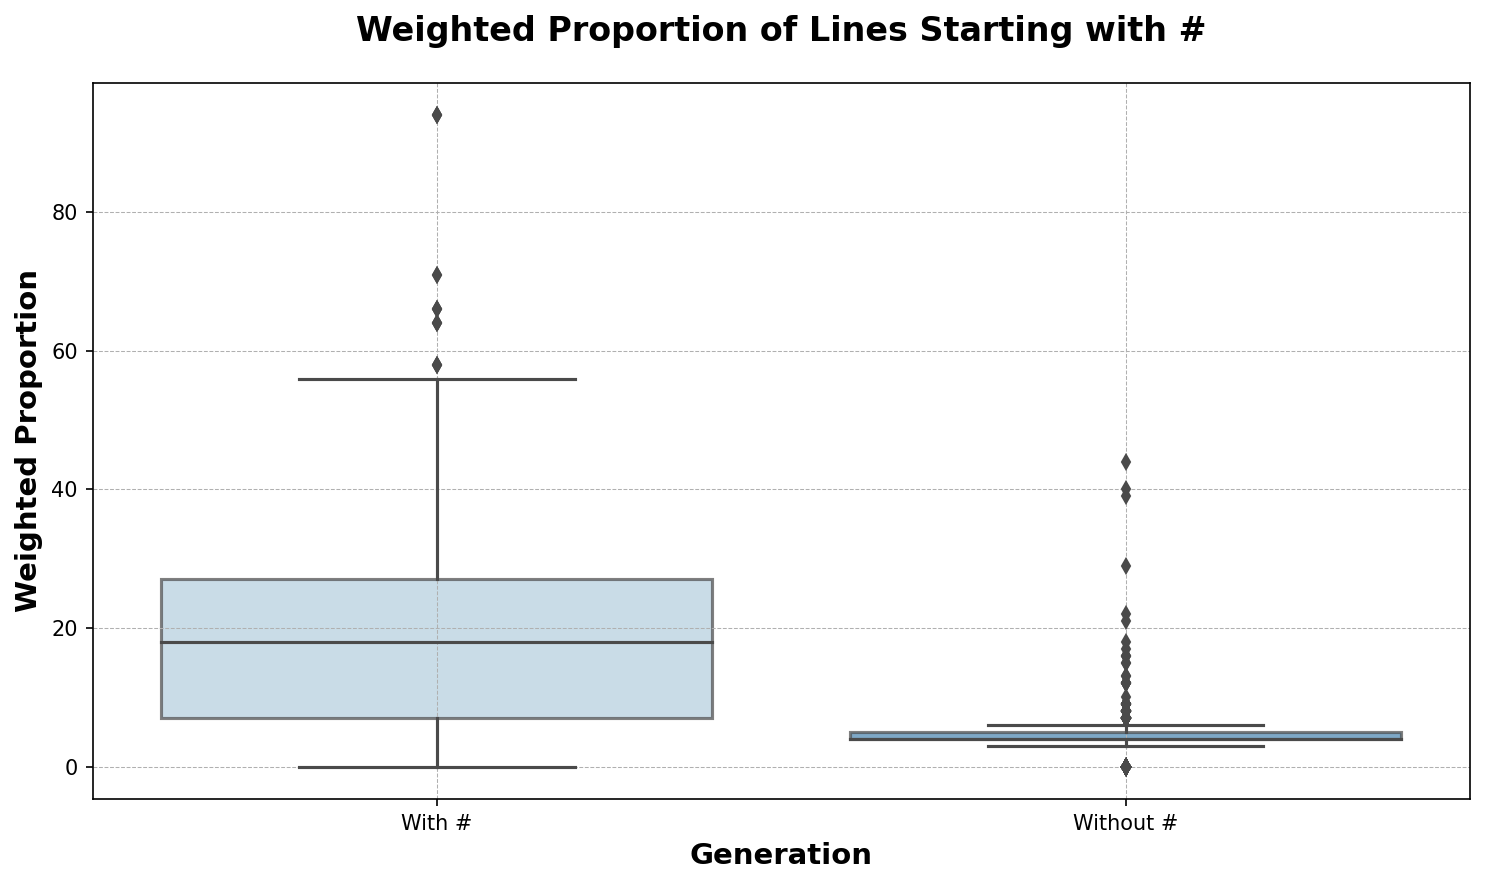

In [27]:


# without #
# code_to_comment_ratio_signatureAndNo
ratio_SignatureOnly_La_no = code_to_comment_ratio_signatureAndNo(Large_signatureOnly_no)
ratio_noContext_La_no = code_to_comment_ratio_signatureAndNo(Large_noContext_no)
ratio_SignatureOnly_KW_no = code_to_comment_ratio_signatureAndNo(KeyWordScope_signatureOnly_no)

# code_to_comment_ratio_actualAndFull
ratio_actualContext_La_no = code_to_comment_ratio_actualAndFull(Large_actualContext_no)
ratio_actualContext_KW_no = code_to_comment_ratio_actualAndFull(KeyWordScope_actualContext_no)
ratio_fullContext_KW_no = code_to_comment_ratio_actualAndFull(KeyWordScope_fullContext_no)
ratio_actualContext_La_no = code_to_comment_ratio_actualAndFull(Large_fullContext_no)
ratio_fullContext_Str_no = code_to_comment_ratio_actualAndFull(Structural_fullContext_no)

ratio_comment_without = [
    ratio_SignatureOnly_La_no,ratio_noContext_La_no,ratio_SignatureOnly_KW_no,
    ratio_actualContext_La_no,ratio_actualContext_KW_no,ratio_fullContext_KW_no,
    ratio_actualContext_La_no,ratio_fullContext_Str_no
]
# with #
# code_to_comment_ratio_signatureAndNo
ratio_SignatureOnly_La= code_to_comment_ratio_signatureAndNo(Large_signatureOnly)
ratio_noContext_La = code_to_comment_ratio_signatureAndNo(Large_noContext)
ratio_SignatureOnly_KW = code_to_comment_ratio_signatureAndNo(KeyWordScope_signatureOnly)

# code_to_comment_ratio_actualAndFull
ratio_actualContext_La = code_to_comment_ratio_actualAndFull(Large_actualContext)
ratio_actualContext_KW = code_to_comment_ratio_actualAndFull(KeyWordScope_actualContext)
ratio_fullContext_KW = code_to_comment_ratio_actualAndFull(KeyWordScope_fullContext)
ratio_actualContext_La = code_to_comment_ratio_actualAndFull(Large_fullContext)
ratio_fullContext_Str = code_to_comment_ratio_actualAndFull(Structural_fullContext)

ratio_comment_with = [
    ratio_SignatureOnly_La,ratio_noContext_La,ratio_SignatureOnly_KW,
    ratio_actualContext_La,ratio_actualContext_KW,ratio_fullContext_KW,
    ratio_actualContext_La,ratio_fullContext_Str
]

# flatten
flat_list_nocomment = [item for sublist in ratio_comment_without for item in sublist]
flat_list_comment = [item for sublist in ratio_comment_with for item in sublist]

hypothesis_test_and_plot_weighted(flat_list_comment,flat_list_nocomment)

<h1>Different Stopping Criteria<h1>

In [135]:
#KeyWords and Scope
KeyWordScope_fullContext = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/fullContext.csv')
KeyWordScope_fullContext_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/fullContext_no#.csv')
KeyWordScope_actualContext = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/actualContext.csv')
KeyWordScope_actualContext_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/actualContext_no#.csv')
KeyWordScope_signatureOnly = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/signatureOnly.csv')
KeyWordScope_signatureOnly_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/signatureOnly_no#.csv')

# Large
Large_fullContext = pd.read_csv('data/MTBP/step_by_step/Large/fullContextLarge.csv')
Large_fullContext_no = pd.read_csv('data/MTBP/step_by_step/Large/fullContext_no#.csv')
Large_actualContext = pd.read_csv('data/MTBP/step_by_step/Large/actualContext.csv')
Large_actualContext_no = pd.read_csv('data/MTBP/step_by_step/Large/actualContext_no#.csv')
Large_signatureOnly = pd.read_csv('data/MTBP/step_by_step/Large/signatureOnly.csv')
Large_signatureOnly_no = pd.read_csv('data/MTBP/step_by_step/Large/signatureOnly_no#.csv')

Large_noContext = pd.read_csv('data/MTBP/step_by_step/Large/noContext.csv')
Large_noContext_no = pd.read_csv('data/MTBP/step_by_step/Large/noContext_no#.csv')

# OneLine
OneLine_fullContext = pd.read_csv('data/MTBP/step_by_step/OneLine/fullContext.csv')
OneLine_actualContext = pd.read_csv('data/MTBP/step_by_step/OneLine/actualContext.csv')
OneLine_signatureOnly = pd.read_csv('data/MTBP/step_by_step/OneLine/signatureOnly.csv')

OneLine_noContext = pd.read_csv('data/MTBP/step_by_step/OneLine/noContext.csv')

#Structural
Structural_fullContext = pd.read_csv('data/MTBP/step_by_step/Structural/fullContext.csv')
Structural_fullContext_no = pd.read_csv('data/MTBP/step_by_step/Structural/fullContext_no#.csv')

Structural_actualContext_no = pd.read_csv('data/MTBP/step_by_step/Structural/actualContext_Str_no#.csv')
Structural_actualContext = pd.read_csv('data/MTBP/step_by_step/Structural/actualContext_Str.csv')
Structural_signatureOnly_no = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/ReplaceFinalPrint/signatureOnly_no#.csv')
Structural_signatureOnly = pd.read_csv('data/MTBP/step_by_step/KeyWordandScope/ReplaceFinalPrint/signatureOnly.csv')


# fullContext no #
lenght_KW_fullContext_no = extract_length_fullContext(KeyWordScope_fullContext_no)
lenght_La_fullContext_no = extract_length_fullContext(Large_fullContext_no)
lenght_St_fullContext_no = extract_length_fullContext(Structural_fullContext_no)

# actualContext no #
lenght_KW_actualContext_no = extract_length_actualContext(KeyWordScope_actualContext_no)
lenght_La_actualContext_no = extract_length_actualContext(Large_actualContext_no)
lenght_St_actualContext_no = extract_length_actualContext(Structural_actualContext_no)

# SignatureOnly no#
lenght_KW_signatureOnly_no = extract_length_SignatureOnly(KeyWordScope_signatureOnly_no)
lenght_La_signatureOnly_no = extract_length_SignatureOnly(Large_signatureOnly_no)
lenght_St_signatureOnly_no = extract_length_SignatureOnly(Structural_signatureOnly_no)
# noContext no#
lenght_La_noContext_no = extract_length_noContext(Large_noContext_no)


list_KW = [lenght_KW_fullContext_no, lenght_La_fullContext_no, lenght_St_fullContext_no, lenght_KW_actualContext_no, lenght_La_actualContext_no,lenght_KW_signatureOnly_no,lenght_La_signatureOnly_no, lenght_La_noContext_no]

############################################################################################

# fullContext
lenght_KW_fullContext = extract_length_fullContext(KeyWordScope_fullContext)
lenght_La_fullContext = extract_length_fullContext(Large_fullContext)
lenght_St_fullContext = extract_length_fullContext(Structural_fullContext)
length_OL_fullContext = extract_length_fullContext(OneLine_fullContext)
# actualContext
lenght_KW_actualContext = extract_length_actualContext(KeyWordScope_actualContext)
lenght_La_actualContext = extract_length_actualContext(Large_actualContext)
lenght_St_actualContext = extract_length_actualContext(Structural_actualContext)
length_OL_actualContext = extract_length_actualContext(OneLine_actualContext)
# SignatureOnly
lenght_KW_signatureOnly = extract_length_SignatureOnly(KeyWordScope_signatureOnly)
lenght_La_signatureOnly = extract_length_SignatureOnly(Large_signatureOnly)
lenght_St_signatureOnly = extract_length_SignatureOnly(Structural_signatureOnly)
lenght_OL_signatureOnly = extract_length_SignatureOnly(OneLine_signatureOnly)
# noContext
lenght_La_noContext = extract_length_noContext(Large_noContext)

list_with = [lenght_KW_fullContext, lenght_La_fullContext, lenght_St_fullContext, 
lenght_KW_actualContext, lenght_La_actualContext,lenght_KW_signatureOnly,
lenght_La_signatureOnly, lenght_La_noContext]

In [136]:
# full context
list_of_fullContext_Lenght = [lenght_KW_fullContext_no, lenght_La_fullContext_no, lenght_St_fullContext_no,
lenght_KW_fullContext,lenght_La_fullContext,lenght_St_fullContext, length_OL_fullContext]
# actual context
list_of_actualContext_Lenght = [lenght_KW_actualContext_no, lenght_La_actualContext_no, lenght_St_actualContext_no, 
lenght_KW_actualContext, lenght_La_actualContext, lenght_St_actualContext, length_OL_actualContext]

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def compare_and_plot(fullContext_lengths, actualContext_lengths):
    # Compute average lengths
    mean_fullContext = np.mean([np.mean(l) for l in fullContext_lengths])
    mean_actualContext = np.mean([np.mean(l) for l in actualContext_lengths])
    
    # Use the 'ggplot' style for the plot
    plt.style.use('ggplot')
    
    # Generate bar plot
    labels = ["Full Context", "Actual Context"]
    means = [mean_fullContext, mean_actualContext]

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(labels, means, color=plt.cm.Paired.colors[:2])

    # Add labels, title, and grid
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_title('Mean Lengths: Full Context vs Actual Context', fontsize=16)
    ax.set_ylabel('Mean Length', fontsize=14)
    ax.grid(axis='y')

    # Display data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=12)

    # Perform t-test
    flat_fullContext = [item for sublist in fullContext_lengths for item in sublist]
    flat_actualContext = [item for sublist in actualContext_lengths for item in sublist]
    t_stat, p_val = ttest_ind(flat_fullContext, flat_actualContext)
    
    if p_val < 0.05 and mean_actualContext > mean_fullContext:
        result = "significantly greater"
    else:
        result = "not significantly greater"
    print(f"Mean length of Actual Context is {result} than Full Context. p-value: {p_val:.4f}")

    plt.tight_layout()
    plt.show()

Mean length of Actual Context is not significantly greater than Full Context. p-value: 0.0000


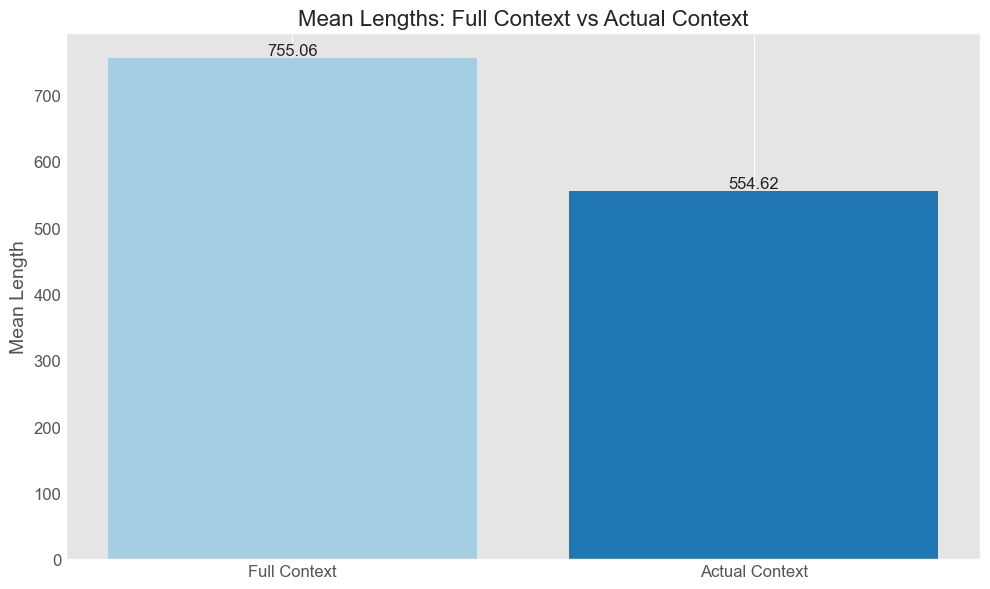

In [140]:
compare_and_plot(list_of_fullContext_Lenght,list_of_actualContext_Lenght )

In [91]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "actualContext_KeyWord": lenght_KW_actualContext,
    "actualContext_KeyWord_no#": lenght_KW_actualContext_no,
    "actualContext_Large": lenght_La_actualContext,
    "actualContext_Large_no#": lenght_La_actualContext_no,
    "actualContext_Structural": lenght_St_actualContext,
    "actualContext_Structural_no#": lenght_St_actualContext_no,
    "actualContext_OneLine": length_OL_actualContext
}

def plot_average_lengths(data):
    # Compute the average lengths
    means = {key: np.mean(value) for key, value in data.items()}
    
    # Use the 'ggplot' style for the plot
    plt.style.use('ggplot')
    
    # Generate the bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = plt.bar(means.keys(), means.values(), color=plt.cm.Paired.colors)
    
    # Rotate the x-labels for clarity
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # Set title, grid, and y-label
    ax.set_title("Average Lengths for Stopping Criteria", fontsize=14)
    ax.set_ylabel("Mean Length", fontsize=12)
    ax.grid(axis='y')
    
    # Display data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval,2), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

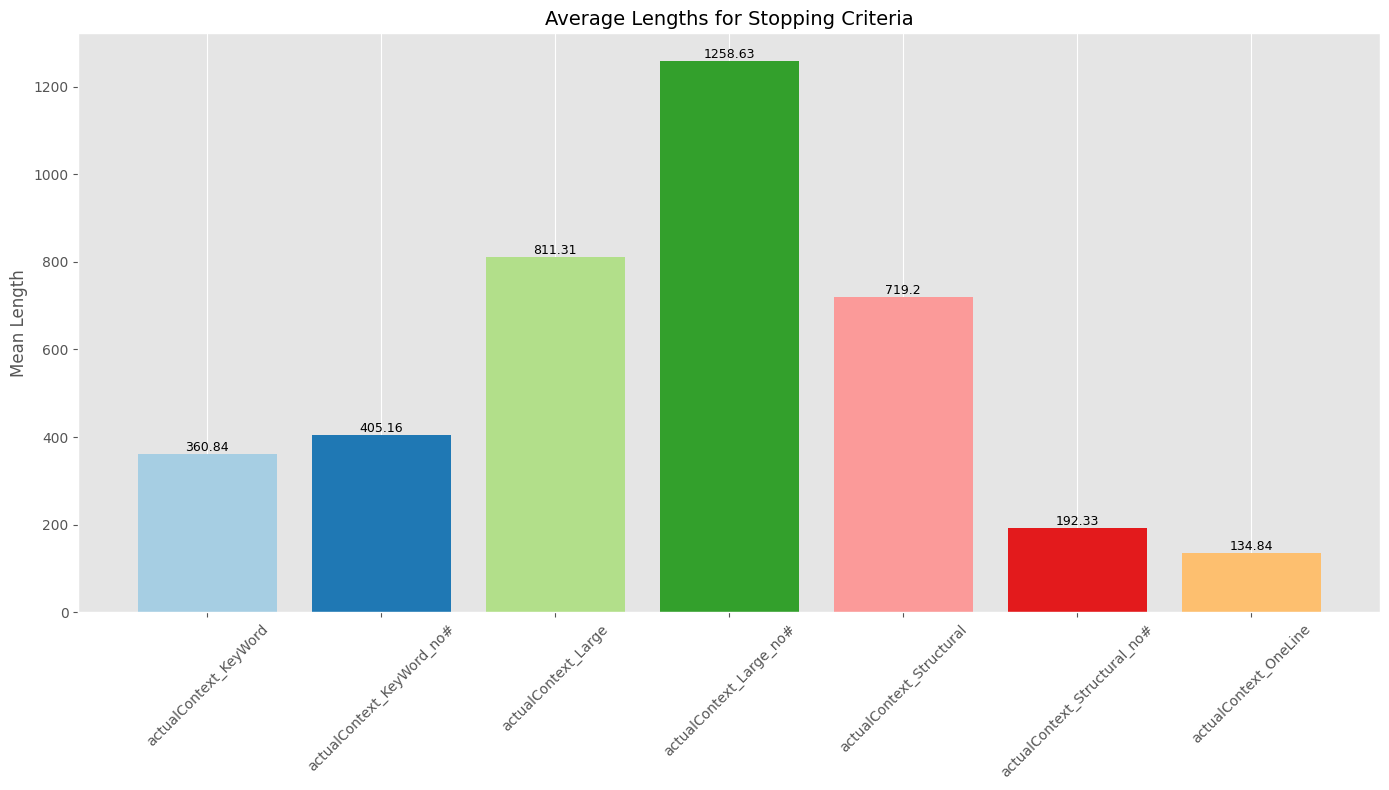

In [92]:
plot_average_lengths(data)

<h1>Hypothesis testing<h1>

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def hypothesis_test(list_with_hash, list_without_hash, alpha=0.05):
    # Conducting the t-test
    t_stat, p_val = stats.ttest_ind(list_with_hash, list_without_hash, alternative='greater', equal_var=False)
    
    # Verifying the null hypothesis
    reject_null = p_val < alpha
    
    # Setting up a high-quality figure with a white background
    plt.figure(figsize=(10, 6), dpi=150)

    # Bar chart
    means = [np.mean(list_with_hash), np.mean(list_without_hash)]
    labels = ["With #", "Without #"]
    sns.barplot(x=labels, y=means, palette="Blues", alpha=0.7)

    # Style adjustments to match the example
    plt.title("Mean Length of Generated Solutions", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Solution Type", fontsize=14, fontweight='bold')
    plt.ylabel("Mean Length", fontsize=14, fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 6), dpi=150)
    sns.boxplot(data=[list_with_hash, list_without_hash], palette="Blues", boxprops=dict(alpha=0.7))
    
    # Style adjustments to match the example
    plt.xticks(ticks=[0, 1], labels=labels, fontsize=12)
    plt.title("Distribution of Lengths of Generated Solutions", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Solution Type", fontsize=14, fontweight='bold')
    plt.ylabel("Solution Length", fontsize=14, fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()

    return reject_null, p_val

flat_list_nohash = [item for sublist in list_no for item in sublist]
flat_list_hash = [item for sublist in list_with for item in sublist]

hypo, p_val = hypothesis_test(flat_list_hash,flat_list_nohash)

<h1>Evaluate Step by Step<h1>

In [127]:
import ast

def pass_1_report(data):

    average_pass = 0

    for i in range(len(data)):

        pass1 = ast.literal_eval(data.iloc[i]['Pass_one'])

        average_pass += ( sum(pass1) / len(pass1) )

    return average_pass

In [102]:
import os
def get_filenames(directory_path):
    """
    Returns a list of filenames from the given directory.

    Args:
    - directory_path (str): Path to the directory

    Returns:
    - list of str: List of filenames in the directory
    """
    return [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

In [144]:
directory_name = 'data/MTBP/FinalReport/ReportLength/'
list_files = get_filenames(directory_name)

In [109]:
list_files[0][:-4]

'report_KWR_actualContext'

In [145]:
import pandas as pd

def calculate_passOne(directory_name):
    list_files = get_filenames(directory_name)

    for k in range(len(list_files)):
        report_path = directory_name + list_files[k]
        name = list_files[k][:-4]

        data = pd.read_csv(report_path)

        pass_1 = pass_1_report(data)

        print(name, pass_1)
    
    return None    

In [129]:
data = pd.read_csv('data/MTBP/FinalReport/report_KWR_actualContext.csv')

In [126]:
t = ast.literal_eval(data.iloc[0]['Pass_one'])
sum(t)

0.0

In [146]:
calculate_passOne(directory_name)

report_02_MTBP_Alpha_AOR_LenLine 0.2
report_02_MTBP_Alpha_AOR_LenToken 0.6
report_02_MTBP_Alpha_AOR_LenWord 1.4
report_02_MTBP_Alpha_Diff_lenLine 1.0
report_02_MTBP_Alpha_Diff_lenToken 1.0
report_02_MTBP_Alpha_Diff_lenWord 0.4
report_42_MTBP_Alpha_AOR_FiveMinThree_LenToken 2.8000000000000003
report_42_MTBP_Alpha_Diff_MinTwoFour_lenLine 0.6
report_42_MTBP_Alpha_Diff_MinTwoFour_lenToken 0.4
report_42_MTBP_Alpha_Diff_MinTwoFour_lenWord 1.0
report_86_MTBP_Alpha_Diff_MinSixEightr_lenToken 0.8


In [132]:
calculate_passOne(directory_name)

reports_Imports_no#_structural_mtbp_with_context_Greedy 0.0
reports_lines_lenght_penalty 2.2
reports_lines_lenght_penalty_noreturns 0.0
reports_line_by_line_without_context_Sampling 6.6000000000000005
reports_line_by_line_with_context_Sampling 2.0
reports_MTBP_Alpha_AOR_lenLine 0.0
reports_MTBP_Alpha_AOR_lenToken 1.0
reports_MTBP_Alpha_AOR_lenWord 0.0
reports_MTBP_Alpha_Diff_lenLine 1.0
reports_MTBP_Alpha_Diff_lenToken 1.0
reports_MTBP_Alpha_Diff_lenWord 0.4
reports_MTBP_Alpha_Ratio_lenLine 0.2
reports_MTBP_Alpha_Ratio_lenToken 2.8000000000000003
reports_MTBP_Alpha_Ratio_lenWord 0.0
reports_MTBP_Processed_Greedy_solutions 17.599999999999994
reports_no#_structural_mtbp_with_context_Greedy 14.599999999999996
reports_prompt_vs_context 2.0
reports_structural_mtbp_with_context_Greedy 12.4
reports_structural_mtbp_with_context_Sampling 10.4
reports_token_length_penalty 2.8000000000000003
reports_token_length_penalty_noreturns 0.2
reports_words_length_penalty 2.0
reports_words_length_penalty_n

In [37]:
import pandas as pd

test = pd.read_csv('data/MTBP/FinalReport/ReportLength/report_42_MTBP_Alpha_AOR_FiveMinThree_LenToken.csv')
example = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/AOR/5-3/MTBP_Alpha_AOR_FiveMinThree_LenToken.csv')

In [36]:
import ast

# [23], 106
# Indices of 4.0: [29, 58]

test.iloc[23]['candidate']


'[[\'def sum_even_digits(a,b):\\n\\t#Given two positive integers {a} and {b}, store the even single digits between a and b (inclusive) as "my_digits". \\n\\tmy_digits = 0\\n\\tfor i in range(a,b+1):\\n\\t\\tif i%2==0:\\n\\t\\t\\tmy_digits += i\\n\\t#Assign the sum of the even digits to the variable "result". import random import from import random_ import os_22 import 22\\n\\t#Print the resulting number as integer.\\n\\tresult = my_digits\\n\\treturn result\']]'

In [45]:
reference = pd.read_csv('data/MTBP/Prompt_vs_context/LenghtPenalty/noContext_fullContext.csv')

In [57]:
t = ast.literal_eval(reference.iloc[58]['codes_with_context'])[-1]
print(t)

def longest_word(A):
	#Assign the list of words "{A}" to a variable named "my_words".
	my_words = A
	longest_word = ""
	for word in my_words:
		if len(word) > len(longest_word):
			longest_word = word
	#Count the length of the words in the list and store as a dictionary word_count.
	#Find the element with the largest count in dictionary word_count and store as longest_word.
	word_count = {}
	for word in my_words:
		if word in word_count:
			word_count[word] += 1
		else:
			word_count[word] = 1
	longest_word = max(word_count, key=word_count.get)
	#print the variable longest_word.
	return longest_word


In [58]:
print(example.iloc[58]['code_test'])

def longest_word(A):
	#Assign the list of words "{A}" to a variable named "my_words".
	my_words = A
	if my_words == None:
	else:
		my_words = [word for word in my_words if word.isalpha()] #remove all non-alphabetical characters
		my_words = [word for word in my_words if len(word) > 2] #remove words that are too short
		my_words = [word for word in my_words if len(word) < 4] #remove words that are too long
		if my_words ==
	#Count the length of the words in the list and store as a dictionary word_count.  The key is the word, the value is the number of times the word appears in the list.
	word_count = {}
	for word in my_words:
		if word in word_count:
			word_count[word] += 1
		else:
			word_count[word] = 1
	max_word = None
	max_count = 0
	for word in word_count:
		if word_count[word] > max_count:
			max_word = word
			max_count = word_count[word]
	#Find the element with the largest count in dictionary word_count and store as longest_word.
	longest_word = max(word_count, key=word_count.g

In [15]:
test.iloc[114]

candidate    [['def diff_mean_and_median(A):\n\t#Assign the...
test         [['assert diff_mean_and_median([3, 2, 2, 3]) =...
Pass_one                             [0.0, 0.0, 0.0, 0.0, 0.0]
result       [defaultdict(<class 'list'>, {0: [(0, {'task_i...
Name: 114, dtype: object

| Time/Day  | Monday  | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
|----------|---------|---------|-----------|----------|--------|----------|--------|
| 9am-10am | C1-L&Q  | C1-L&Q  | C1-L&Q    | C1-L&Q   | C1-L&Q | C1-L&Q   | C1-L&Q |
| 10am-11am| C1-L&Q  | C1-L&Q  | C1-L&Q    | C1-L&Q   | C1-L&Q | C1-L&Q   | C1-L&Q |
| 11am-12pm| C1-L&Q  | C1-L&Q  | C1-L&Q    | C1-L&Q   | C1-L&Q | C1-L&Q   | C1-L&Q |
| 12pm-1pm | C2-L&Q  | C2-L&Q  | C2-L&Q    | C2-L&Q   | C2-L&Q | C2-L&Q   | C2-L&Q |
| 2:30pm-3:30pm| C2-L&Q | C1-2R | C2-L&Q   | C1-2R   | C1-2R | Catch-up | C1-2R |
| 3:30pm-4:30pm| C1-L&Q | C1-2R | C2-L&Q   | C1-2R   | C1-2R | Catch-up | C1-2R |
| 4:30pm-5:30pm| C1-L&Q | C1-2R | C2-L&Q   | C1-2R   | C1-2R | Catch-up | C1-2R |
| 6pm-7pm | C1-L&Q   | C1-2R  | C1-2R     | C1-2R    | C1-2R | C1-2R    | Free   |
| 7pm-8pm | Conference    | C1-2R  | Conference| C1-2R    | C1-2R | C1-2R    | Free   |
| 9:30pm-10:30pm | Conference | C1-2R | Conference | C2-2R | C2-2R | C2-2R | Free |
| 10:30pm-11:30pm| Free | Free  | Free     | C2-2R    | C2-2R | C2-2R    | Free   |


| Time/Day  | Monday  | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
|----------|---------|---------|-----------|----------|--------|----------|--------|
| 9am-10am | C1-L&Q  | C1-L&Q  | C1-L&Q    | C1-L&Q   | C1-L&Q | C1-L&Q   | C1-L&Q |
| 10am-11am| C1-L&Q  | C1-L&Q  | C1-L&Q    | C1-L&Q   | C1-L&Q | C1-L&Q   | C1-L&Q |
| 11am-12pm| C1-L&Q  | C1-L&Q  | C1-L&Q    | C1-L&Q   | C1-L&Q | C1-L&Q   | C1-L&Q |
| 12pm-1pm | C2-L&Q  | C2-L&Q  | C2-L&Q    | C2-L&Q   | C2-L&Q | C2-L&Q   | C2-L&Q |
| 2:30pm-3:30pm| C2-L&Q | C1-2R | C2-L&Q   | C1-2R   | C1-2R | Catch-up | C1-2R |
| 3:30pm-4:30pm| C1-L&Q | C1-2R | C2-L&Q   | C1-2R   | C1-2R | Catch-up | C1-2R |
| 4:30pm-5:30pm| C1-L&Q | C1-2R | C2-L&Q   | C1-2R   | C1-2R | Catch-up | C1-2R |
| 6pm-7pm | C1-L&Q   | C1-2R  | C1-2R     | C1-2R    | C1-2R | C1-2R    | Free   |
| 7pm-8pm | Conference    | C1-2R  | Conference| C1-2R    | C1-2R | C1-2R    | Free   |
| 9:30pm-10:30pm | Conference | C1-2R | Conference | C2-2R | C2-2R | C2-2R | Free |
| 10:30pm-11:30pm| Free | Free  | Free     | C2-2R    | C2-2R | C2-2R    | Free   |

In [1]:
import pandas as pd

# Data for the schedule
data = {
    "Time/Day": ["9am-10am", "10am-11am", "11am-12pm", "12pm-1pm", "2:30pm-3:30pm", "3:30pm-4:30pm", "4:30pm-5:30pm", "6pm-7pm", "7pm-8pm", "9:30pm-10:30pm", "10:30pm-11:30pm"],
    "Monday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "C2-L&Q", "C1-L&Q", "C1-L&Q", "C1-L&Q", "Free", "Conference", "Free"],
    "Tuesday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "Free"],
    "Wednesday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "C2-L&Q", "C2-L&Q", "C2-L&Q", "C1-2R", "Conference", "Conference", "Free"],
    "Thursday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "C2-2R", "C2-2R"],
    "Friday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "C1-2R", "C2-2R", "C2-2R"],
    "Saturday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "Catch-up", "Catch-up", "Catch-up", "C1-2R", "C1-2R", "C2-2R", "C2-2R"],
    "Sunday": ["C1-L&Q", "C1-L&Q", "C1-L&Q", "C2-L&Q", "C1-2R", "C1-2R", "C1-2R", "Free", "Free", "Free", "Free"]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("student_schedule.csv", index=False)
